### Importing modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

### Loading the data

In [14]:
data = scipy.io.loadmat('sample(num_img).mat')
theta1 = np.genfromtxt('Theta1.txt', delimiter=' ')
theta2 = np.genfromtxt('Theta2.txt', delimiter=' ')

X = data['X']
Y = data['y']

m = X.shape[0]

#Randomly select 100 data points to display
randIndices = np.random.permutation(m)

x = X[randIndices[0:100], :]
y = Y[randIndices[0:100], :]

In [15]:
def nnCostFunction(theta1,theta2,inputLayerSize,hiddenLayerSize,numLabels,X, y,lambda_):
    #No. of samples
    m = X.shape[0]

    #Cost
    J = 0

    theta1Grad = np.zeros_like(theta1)
    theta2Grad = np.zeros_like(theta2)
   
    # recode y to Y, a good way to learn
    I = np.eye(numLabels)
    Y = np.zeros((m, numLabels))
    
    #Preparing output marix
    for i in range(0,m):
        Y[i, :] = I[(y[i]-1), :]

    # feedforward
    a1 = np.column_stack((np.ones((m, 1)), X))
    z2 = np.matmul(a1,np.transpose(theta1))
    a2 = np.column_stack((np.ones((np.shape(z2)[0], 1)),sigmoid(z2)))
    z3 = np.matmul(a2,np.transpose(theta2))
    a3 = sigmoid(z3)
    h = a3

    # calculte penalty
    p = np.sum(theta1[:, 1:]**2) + np.sum(theta2[:, 1:]**2)

    # calculate J
    J = np.sum((-Y)*np.log(h) - (1-Y)*np.log(1-h))/m + lambda_*p/(2*m)

    # calculate deltas
    delta3 = a3 - Y
    delta2 = np.matmul(delta3,theta2[:,1:])*sigmoidGradient(z2)

    # accumulate gradients
    Delta1 = np.matmul(np.transpose(delta2),a1)
    Delta2 = np.matmul(np.transpose(delta3),a2)

    # calculate regularized gradient
    theta1Reg = theta1
    theta1Reg[:,0] = 0
    theta2Reg = theta2
    theta2Reg[:,0] = 0
    
    p1 = (lambda_/m) * theta1Reg
    p2 = (lambda_/m) * theta2Reg
    theta1Grad = Delta1 / m + p1
    theta2Grad = Delta2 / m + p2
    
    grad = [theta1Grad[:,:] ,theta2Grad[:]]

    return grad,h



In [16]:
def sigmoidGradient(z):
    #SIGMOIDGRADIENT returns the gradient of the sigmoid function
    g = np.zeros(np.shape(z))

    g = sigmoid(z)*(1-sigmoid(z))

    return g

In [17]:
def sigmoid(z):
    sig = 1.0/(1.0+np.exp(-z))
    return sig

In [18]:
def randInitializeWeights(L_in, L_out):
    W = zeros(L_out, 1 + L_in)
    epsilonInit = 0.12
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilonInit - epsilonInit
    return W


In [66]:
def predict(Theta1, Theta2, x):
    #PREDICT Predict the label of an input given a trained neural network

    #No. of samples
    m = np.shape(x)[0]
    num_labels = np.shape(Theta2)[0]
    p = np.zeros((m, 1))
    

    X1 = np.column_stack((np.ones((m, 1)), x))
    z1 = np.matmul(X1 ,np.transpose(Theta1))
    h1 = sigmoid(z1)
    
    X2 = np.column_stack((np.ones((m, 1)), h1))
    z2 = np.matmul(X2, np.transpose(Theta2))
    h2 = sigmoid(z2)
    predictions = np.array([])
    for row in h2:
        predictions = np.append(predictions,np.where(row==np.max(row))[0]+1)
   
    return predictions


In [67]:
def displayData(X):
    #nO. OF SAMPLES
    m = np.shape(X)[0]
    
    #No. of features
    n = np.shape(X)[1]
    
    #Calculating sample width and height
    sampleWidth = int(np.round(np.sqrt(n)))
    sampleHeight = int((n / sampleWidth))
    
    imgWidth = int(np.floor(np.sqrt(m)))
    imgHeight =  int(np.ceil(m / imgWidth))
    
    #Padding between images 
    padding = 1
    
    # Setup blank display
    imgArray = np.ones((int(padding + imgHeight * (sampleHeight + padding)),int(padding + imgWidth * (sampleWidth + padding))))
    
    currSample = 0
    for i in range(0,imgHeight):
        for j in range(0,imgWidth):
            imgArray[int(i*(sampleHeight+1) + padding ):int((i+1)*(sampleHeight+1)),int(j*(sampleWidth+1) + padding ):int((j+1)*(sampleWidth+1))] = np.transpose(X[currSample].reshape(sampleHeight,sampleWidth))
            currSample = currSample + 1
      
    return imgArray


### =========== Visualizing Data =============

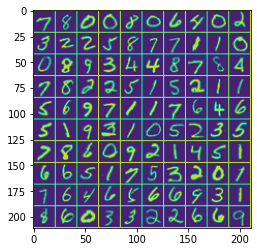

In [68]:
plt.imshow(displayData(x))

In [69]:
inputLayerSize  = 400  
hiddenLayerSize = 25   
numLabels = 10
lambda_ = 3
grad,prediction = nnCostFunction(theta1,theta2,inputLayerSize,hiddenLayerSize,numLabels,X,Y,lambda_)


In [70]:
predictions =predict(theta1,theta2,X)

In [74]:
displayData()

0.100094

In [72]:
a = np.array([1])

In [62]:
np.put(a,10)

TypeError: _put_dispatcher() missing 1 required positional argument: 'v'

In [65]:
np.insert(a,values=[2])

TypeError: _insert_dispatcher() missing 1 required positional argument: 'obj'